In [35]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('jena_climate_2009_2016.csv')
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [37]:
df = df[5::6] # take datas hours by hours
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [38]:
df.index = pd.to_datetime(df['Date Time'],format='%d.%m.%Y %H:%M:%S')
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


<AxesSubplot:xlabel='Date Time'>

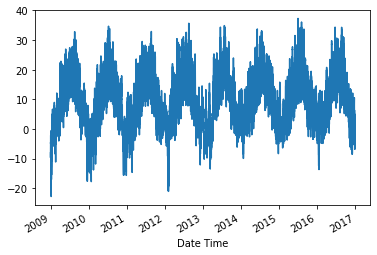

In [39]:
temp = df['T (degC)'] # Temperature Degrees Celsius
temp.plot()

In [40]:
def df_to_X_y(df,window_size = 5):
    df_as_np = df.to_numpy()
    X = []
    y=[]
    for i in range(len(df_as_np)-window_size):
        row = [[a]for a in  df_as_np[i:i+5]] #independent variables
        X.append(row)
        label = df_as_np[i+5]#dependent variables
        y.append(label)
    return np.array(X) , np.array(y)

In [41]:
window = 5
X,y = df_to_X_y(temp,window)
X.shape , y.shape

((70086, 5, 1), (70086,))

In [42]:
X

array([[[-8.05],
        [-8.88],
        [-8.81],
        [-9.05],
        [-9.63]],

       [[-8.88],
        [-8.81],
        [-9.05],
        [-9.63],
        [-9.67]],

       [[-8.81],
        [-9.05],
        [-9.63],
        [-9.67],
        [-9.17]],

       ...,

       [[ 2.44],
        [ 1.29],
        [-0.42],
        [-0.98],
        [-1.4 ]],

       [[ 1.29],
        [-0.42],
        [-0.98],
        [-1.4 ],
        [-2.75]],

       [[-0.42],
        [-0.98],
        [-1.4 ],
        [-2.75],
        [-2.89]]])

In [43]:
y

array([-9.67, -9.17, -8.1 , ..., -2.75, -2.89, -3.93])

In [44]:
x_train,y_train = X[:60000] , y[:60000]
x_val,y_val = X[60000:65000] , y[60000:65000]
x_test,y_test = X[65000:] , y[65000:]
x_train.shape , y_train.shape , x_val.shape , y_val.shape , x_test.shape , y_test.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [47]:
model = Sequential()
model.add(InputLayer((5,1)))
model.add(GRU(64,return_sequences=True))
model.add(LeakyReLU())
model.add(GRU(32))
model.add(LeakyReLU())
model.add(Dense(32))
model.add(LeakyReLU())
model.add(Dense(1,activation='linear'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 5, 64)             12864     
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 5, 64)             0         
                                                                 
 gru_9 (GRU)                 (None, 32)                9408      
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [55]:
cp = ModelCheckpoint('model/',save_best_only=True)
model.compile(loss=MeanSquaredError() , optimizer='adam',metrics=[RootMeanSquaredError()])

In [56]:
model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10,callbacks=[cp])

Epoch 1/10
1874/1875 [============================>.] - ETA: 0s - loss: 4.5688 - root_mean_squared_error: 2.1375

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


1875/1875 [==============================] - 33s 16ms/step - loss: 4.5667 - root_mean_squared_error: 2.1370 - val_loss: 0.4929 - val_root_mean_squared_error: 0.7021
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.7061 - root_mean_squared_error: 0.8403 - val_loss: 0.5447 - val_root_mean_squared_error: 0.7380
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6896 - root_mean_squared_error: 0.8304 - val_loss: 0.5071 - val_root_mean_squared_error: 0.7121
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.6882 - root_mean_squared_error: 0.8296 - val_loss: 0.5109 - val_root_mean_squared_error: 0.7148
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.6844 - root_mean_squared_error: 0.8273 - val_loss: 0.5165 - val_root_mean_squared_error: 0.7187
Epoch 6/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.6796 - root_mean_squared_error: 0.8244

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


1875/1875 [==============================] - 34s 18ms/step - loss: 0.6795 - root_mean_squared_error: 0.8243 - val_loss: 0.4881 - val_root_mean_squared_error: 0.6987
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.6721 - root_mean_squared_error: 0.8198 - val_loss: 0.5047 - val_root_mean_squared_error: 0.7104
Epoch 8/10
1875/1875 [==============================] - ETA: 0s - loss: 0.6701 - root_mean_squared_error: 0.8186

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


1875/1875 [==============================] - 28s 15ms/step - loss: 0.6701 - root_mean_squared_error: 0.8186 - val_loss: 0.4836 - val_root_mean_squared_error: 0.6954
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6722 - root_mean_squared_error: 0.8199 - val_loss: 0.5577 - val_root_mean_squared_error: 0.7468
Epoch 10/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.6667 - root_mean_squared_error: 0.8165 - val_loss: 0.5831 - val_root_mean_squared_error: 0.7636


In [57]:
from tensorflow.keras.models import load_model
model1 = load_model('model/')

In [58]:
train_prediction = model1.predict(x_train).flatten()
train_result = pd.DataFrame(data = {'Train Predictions':train_prediction
                                   , 'Actuals':y_train})
train_result

1875/1875 [==============================] - 11s 5ms/step


,Train Predictions,Actuals
0,-9.643088,-9.67
1,-9.299121,-9.17
2,-8.295462,-8.10
3,-6.869366,-7.66
4,-6.978881,-7.04
...,...,...
59995,6.294312,6.07
59996,7.052868,9.88
59997,12.098102,13.53
59998,15.501587,15.43


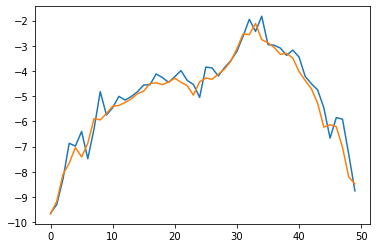

In [60]:
plt.plot(train_result['Train Predictions'][:50])
plt.plot(train_result['Actuals'][:50])

In [63]:
test_prediction = model1.predict(x_test).flatten()
test_result = pd.DataFrame(data = {'Test Predictions':test_prediction
                                   , 'Actuals':y_test})
test_result

159/159 [==============================] - 1s 4ms/step


,Test Predictions,Actuals
0,14.463769,13.99
1,13.356707,13.46
2,13.027467,12.93
3,12.531750,12.43
4,12.101724,12.17
...,...,...
5081,-0.996188,-0.98
5082,-1.397290,-1.40
5083,-1.602146,-2.75
5084,-3.228934,-2.89


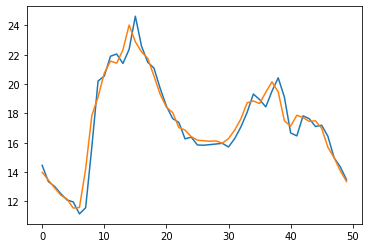

In [64]:
plt.plot(test_result['Test Predictions'][:50])
plt.plot(test_result['Actuals'][:50])